# Flower Detector

In [59]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random as rn

import cv2
from tqdm import tqdm
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [60]:
pwd

'/content'

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
my_data= '/content/drive/MyDrive/DL/flowers'
my_data

'/content/drive/MyDrive/DL/flowers'

In [63]:
os.listdir(my_data)

['daisy', 'dandelion', 'sunflower', 'tulip', 'rose', 'train', 'test']

In [64]:
X = []
Z = []
IMG_SIZE = 150
FLOWER_DAISY_DIR = my_data + '/daisy/'
FLOWER_SUNFLOWER_DIR = my_data + '/sunflower/'
FLOWER_TULIP_DIR = my_data + '/tulip/'
FLOWER_DANDI_DIR = my_data + '/dandelion/'
FLOWER_ROSE_DIR = my_data + '/rose/'
FLOWER_ROSE_DIR

'/content/drive/MyDrive/DL/flowers/rose/'

In [65]:
data_folder = '/content/drive/MyDrive/DL/flowers'

import os
import shutil

train_folder = os.path.join(data_folder, 'train')
test_folder = os.path.join(data_folder, 'test')

train_folder

'/content/drive/MyDrive/DL/flowers/train'

In [66]:
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [67]:
for flower_class in classes:

    train_class_folder = os.path.join(train_folder, flower_class)
    test_class_folder = os.path.join(test_folder, flower_class)
    # create folders
    os.makedirs(train_class_folder, exist_ok=True)
    os.makedirs(test_class_folder, exist_ok=True)

## Randomly add images to train folders

In [68]:
import random

split_ratio = 0.8  # Train için %80, Test için %20
for flower_class in classes:
    flower_images = os.listdir(os.path.join(data_folder, flower_class))
    random.shuffle(flower_images)

    split_index = int(len(flower_images) * split_ratio)

    for image in flower_images[:split_index]:
        src = os.path.join(data_folder, flower_class, image)
        dest = os.path.join(train_folder, flower_class, image)
        shutil.copy(src, dest)

    for image in flower_images[split_index:]:
        src = os.path.join(data_folder, flower_class, image)
        dest = os.path.join(test_folder, flower_class, image)
        shutil.copy(src, dest)


In [69]:
train_path = my_data+'/train/'
test_path = my_data+'/test/'
print(os.listdir(train_path))
print(os.listdir(test_path))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [70]:
import os
import matplotlib.pyplot as plt

classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

data_dir = '/content/drive/MyDrive/DL/flowers'

total_counts = []
total = 0
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    num_images = len([fname for fname in os.listdir(class_dir) if fname.endswith('.jpg')])
    total_counts.append(num_images)
    total += num_images
    print(class_dir)
    print('num of Imgs =', num_images)

print('TOTAL = ',total)
total_counts

/content/drive/MyDrive/DL/flowers/daisy
num of Imgs = 764
/content/drive/MyDrive/DL/flowers/dandelion
num of Imgs = 1076
/content/drive/MyDrive/DL/flowers/rose
num of Imgs = 784
/content/drive/MyDrive/DL/flowers/sunflower
num of Imgs = 733
/content/drive/MyDrive/DL/flowers/tulip
num of Imgs = 984
TOTAL =  4341


[764, 1076, 784, 733, 984]

In [ ]:
import seaborn as sns
from skimage.io import imread
import os

x = []
y = []
hue = []

for class_name in classes:
    class_dir = os.path.join(train_path, class_name)

    for image_name in os.listdir(class_dir):
        if image_name.endswith('.jpg'):  # Sadece .jpg dosyalarını işle
            img = imread(os.path.join(class_dir, image_name))
            d1, d2, colors = img.shape
            print(d1, d2, colors, class_name)
            x.append(d1)
            y.append(d2)
            hue.append(class_name)


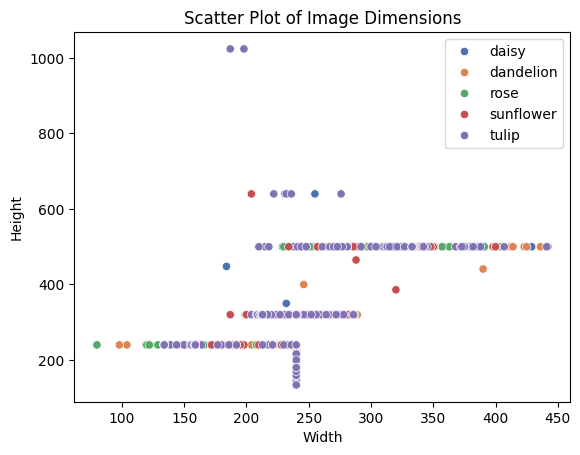

In [72]:
sns.scatterplot(x=x, y=y, hue=hue, palette="deep")
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Scatter Plot of Image Dimensions')
plt.show()

In [73]:
print(np.mean(x), np.mean(y))

253.50883898709986 338.95747730530337


In [74]:
path1=train_path+'/daisy'+"/1342002397_9503c97b49.jpg"
path1

'/content/drive/MyDrive/DL/flowers/train//daisy/1342002397_9503c97b49.jpg'

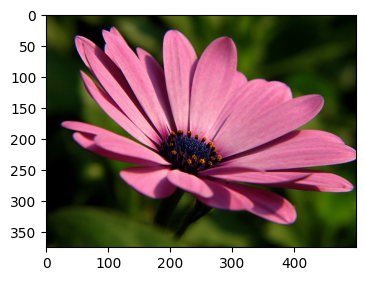

In [75]:
flower_img=imread(path1)
plt.figure(figsize=(4,5))
plt.imshow(flower_img);

In [76]:
path2=train_path+'/daisy'+"/5547758_eea9edfd54_n.jpg"
path2

'/content/drive/MyDrive/DL/flowers/train//daisy/5547758_eea9edfd54_n.jpg'

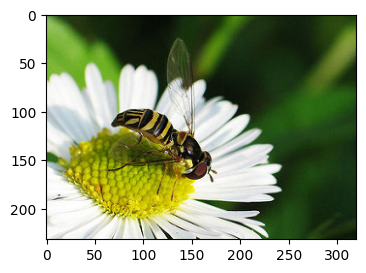

In [77]:
s_flower_img=imread(path2)
plt.figure(figsize=(4,5))
plt.imshow(s_flower_img);

In [78]:
s_img = imread(path2)

s_d1, s_d2, s_colors = s_img.shape
print(s_d1, s_d2, s_colors)

232 320 3


In [79]:
flower_img.max(), flower_img.min()

(255, 0)

In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

flower_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allowe horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )
flower_gen

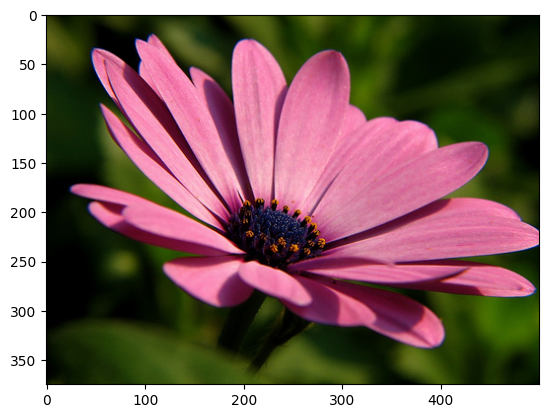

In [81]:
plt.imshow(flower_img)

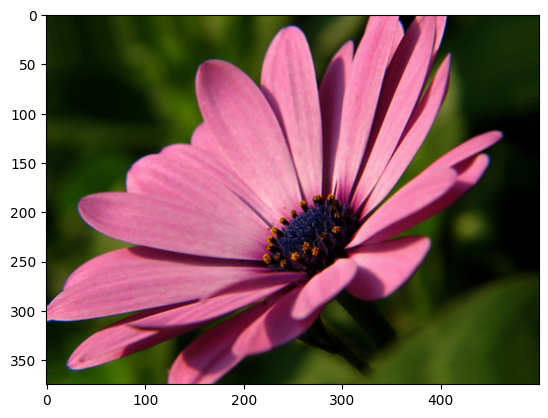

In [82]:
plt.imshow(flower_gen.random_transform(flower_img))

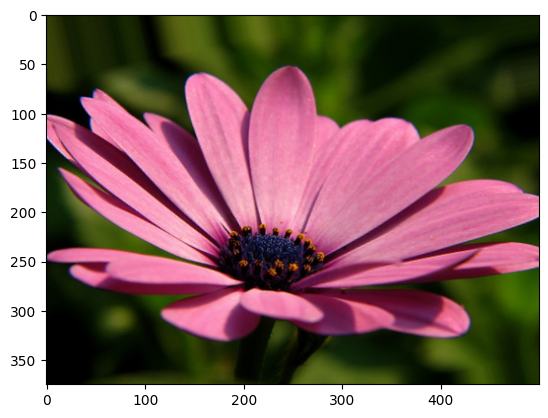

In [83]:
plt.imshow(flower_gen.random_transform(flower_img))

# Create The Model

In [84]:
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D

In [85]:
from tensorflow.keras.layers import BatchNormalization

## Train Images

In [86]:
batch_size = 32
train_flower_gen = flower_gen.flow_from_directory(train_path,

                                               target_size=(224,224),

                                               color_mode='rgb',

                                               batch_size=batch_size,

                                               class_mode='sparse', shuffle=True)

Found 4186 images belonging to 5 classes.


## Test Images

In [87]:
flower_gen_test = ImageDataGenerator()

test_flower_gen = flower_gen_test.flow_from_directory(test_path,

                                                   target_size=(224,224),

                                                   color_mode='rgb',

                                                   batch_size=batch_size,

                                                   class_mode='sparse', shuffle=True)

Found 1661 images belonging to 5 classes.


# VGG16

In [88]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten

# Define the input shape (height, width, channels)
image_shape = (224, 224, 3)

# Build the model using Sequential
vgg16_model = Sequential()

# Add an Input layer to explicitly specify the input shape
vgg16_model.add(Input(shape=image_shape))

# Load the VGG16 model with pre-trained ImageNet weights, without the top layers
pretrained_model = VGG16(include_top=False, weights='imagenet', pooling='avg')

# Set the pre-trained model layers to be non-trainable
for layer in pretrained_model.layers:
    layer.trainable = False

# Add the pre-trained VGG16 model to the Sequential model
vgg16_model.add(pretrained_model)

# Add custom Dense layers
vgg16_model.add(Dense(128, activation='relu'))
vgg16_model.add(Dense(5, activation='softmax'))

# Compile the model
vgg16_model.compile(loss='sparse_categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

# Show the summary of the model
vgg16_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 512)                 │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,780,997 (56.39 MB)

 Trainable params: 66,309 (259.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [89]:
history_vgg16 = vgg16_model.fit(
    train_flower_gen,
    epochs=10,
    validation_data=test_flower_gen,
    callbacks=[early_stop]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 138s 841ms/step - accuracy: 0.4995 - loss: 1.3226 - val_accuracy: 0.5653 - val_loss: 11.8355
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 95s 697ms/step - accuracy: 0.7283 - loss: 0.7837 - val_accuracy: 0.6153 - val_loss: 13.8883
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 134s 633ms/step - accuracy: 0.7770 - loss: 0.6435 - val_accuracy: 0.6364 - val_loss: 15.2650
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 140s 625ms/step - accuracy: 0.7816 - loss: 0.6142 - val_accuracy: 0.6574 - val_loss: 14.5005
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 141s 610ms/step - accuracy: 0.7953 - loss: 0.5878 - val_accuracy: 0.6382 - val_loss: 17.6367
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 85s 609ms/step - accuracy: 0.8195 - loss: 0.5201 - val_accuracy: 0.6616 - val_loss: 17.1463


In [90]:
summary = pd.DataFrame(vgg16_model.history.history)
summary.head()

,accuracy,loss,val_accuracy,val_loss
0,0.611801,1.092926,0.565322,11.835547
1,0.738175,0.749443,0.615292,13.888275
2,0.774247,0.644608,0.636364,15.264993
3,0.783803,0.608855,0.657435,14.500520
4,0.799570,0.566655,0.638170,17.636690


from matplotlib import pyplot as plt
_df_0['accuracy'].plot(kind='hist', bins=20, title='accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['loss'].plot(kind='hist', bins=20, title='loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['val_accuracy'].plot(kind='hist', bins=20, title='val_accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['val_loss'].plot(kind='hist', bins=20, title='val_loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='accuracy', y='loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='loss', y='val_accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='val_accuracy', y='val_loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['accuracy']
  ys = series['loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accuracy')
_ = plt.ylabel('loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['accuracy']
  ys = series['val_accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accuracy')
_ = plt.ylabel('val_accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['accuracy']
  ys = series['val_loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accuracy')
_ = plt.ylabel('val_loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['accuracy']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'accuracy'}, axis=1)
              .sort_values('accuracy', ascending=True))
  xs = counted['accuracy']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accuracy')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['loss'].plot(kind='line', figsize=(8, 4), title='loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['val_accuracy'].plot(kind='line', figsize=(8, 4), title='val_accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['val_loss'].plot(kind='line', figsize=(8, 4), title='val_loss')
plt.gca().spines[['top', 'right']].set_visible(False)

In [92]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=summary)

https://docs.google.com/spreadsheets/d/1x9JlMJFZj-R0pe9tc7w4O5GIjFLFtVAbAdv5a2PZ3LI#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [93]:
vgg16_model.evaluate(test_flower_gen)

52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - accuracy: 0.5761 - loss: 11.1713


[11.835548400878906, 0.5653221011161804]

# Model Performance

In [94]:
import matplotlib.pyplot as plt

def plot_model_performance(history, title='Model Performance'):
    epochs = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Acc')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Acc')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

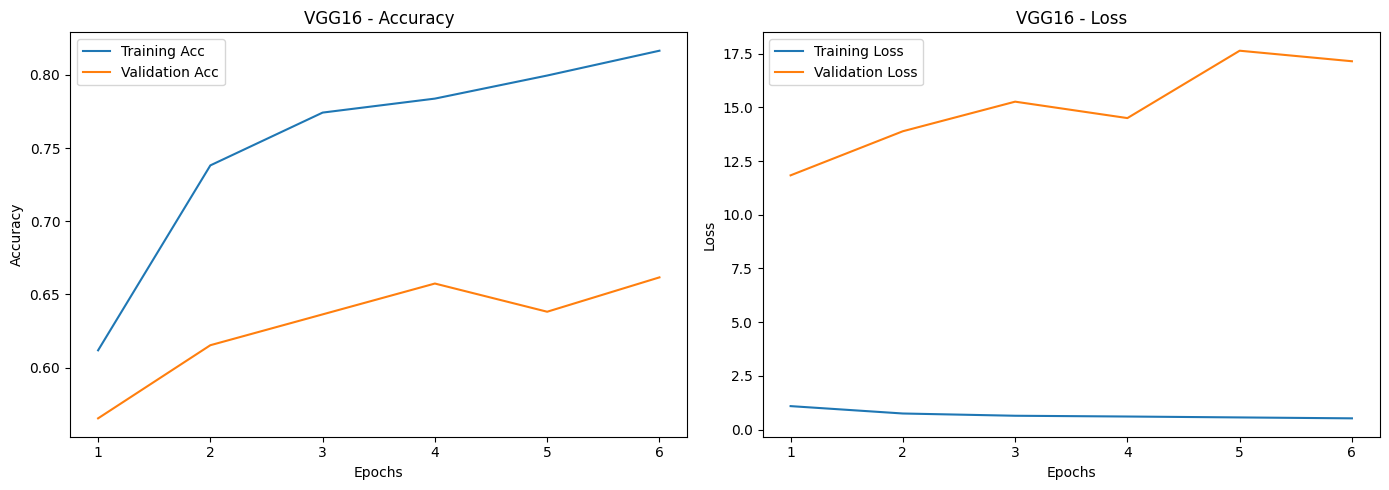

In [95]:
plot_model_performance(history_vgg16, 'VGG16') #updated the performance

# Predicting on an Image

In [96]:
train_flower_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [105]:
import numpy as np
import tensorflow as tf
from PIL import Image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import os

# Load the pre-trained VGG16 model without the top layers
model = VGG16(weights='imagenet')  # Use 'weights=None' if you want to load a custom saved model

# Load and preprocess the image
image_path = '/content/drive/MyDrive/DL/flowers/sunflower/1008566138_6927679c8a.jpg'
image = Image.open(image_path)
image = image.resize((224, 224))
image_array = np.array(image.convert('RGB'))

# Preprocess the image for VGG16
image_array = preprocess_input(image_array)
image_array = np.expand_dims(image_array, axis=0)

# Make prediction
prediction = model.predict(image_array)

# Get the predicted class index
predicted_class_index = np.argmax(prediction)

# Create a mapping of class indices to flower names based on your folder structure
classes = os.listdir('/content/drive/MyDrive/DL/flowers')  # Adjust the path to your flower dataset

# Ensure the classes list is non-empty and sorted
if classes:
    classes.sort()  # Sort to maintain consistent indexing

    # Check if predicted class index is within range
    if predicted_class_index < len(classes):
        predicted_flower_name = classes[predicted_class_index]
    else:
        predicted_flower_name = "Unknown Class Index (Sun flower)"
else:
    predicted_flower_name = "No Classes Found"

print('Predicted flower name:', predicted_flower_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
Predicted flower name: Unknown Class Index (Sun flower)
